In [2]:
#Data source: https://nsidc.org/data/user-resources/data-announcements/new-data-set-release-atlasicesat-2-l3a-along-track-coastal-and-nearshore-bathymetry

# Kandla creek March 2022

In [1]:
# Step 1: Install dependencies (if needed)
!pip install h5py matplotlib numpy

In [2]:
!apt-get install libproj-dev proj-data proj-bin libgeos-dev
!pip install cartopy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.1.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.1.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 197 kB of archives.
After this operation, 504 kB of additional disk space will be used.
Err:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.1.1-1~jammy0
  404  Not Found [IP: 185.125.190.80 443]
E: Failed to fetch https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/pool/main/p/proj/proj-bin_9.1.1-1%7ejammy0_amd64.deb  404  Not Found [IP: 185.125.190.80 443]
E: Unable to fetch some archives, maybe run apt-get update or try with -

In [3]:
!ls -lrt

total 4
drwxr-xr-x 1 root root 4096 May 14 13:38 sample_data


In [7]:
!pwd

/content


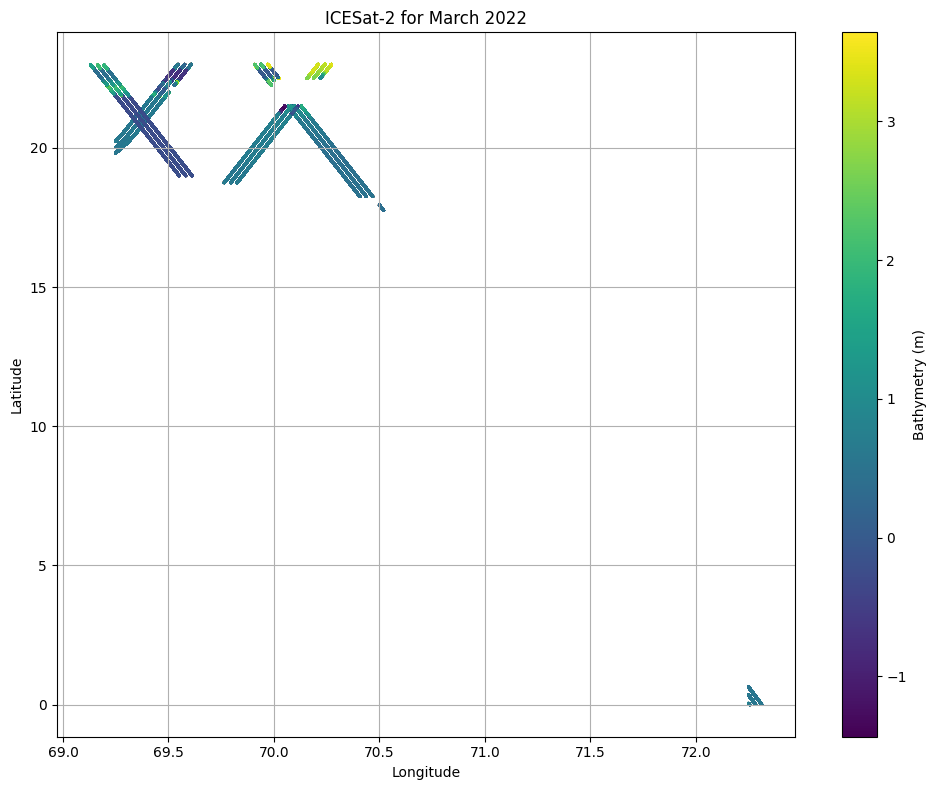

In [8]:
# Step 2: Upload the files
# from google.colab import files
# uploaded = files.upload()

# Step 3: Import libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Step 4: Define function to extract surface height data
def extract_surface_data(filename):
    tracks = ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
    all_lon, all_lat, all_surface_h = [], [], []

    with h5py.File(filename, 'r') as f:
        for track in tracks:
            if track in f:
                lon = f[track]['lon_ph'][:]
                lat = f[track]['lat_ph'][:]
                surface_h = f[track]['surface_h'][:]
                mask = ~np.isnan(surface_h)
                all_lon.append(lon[mask])
                all_lat.append(lat[mask])
                all_surface_h.append(surface_h[mask])

    if all_lon:
        return np.concatenate(all_lon), np.concatenate(all_lat), np.concatenate(all_surface_h)
    else:
        return np.array([]), np.array([]), np.array([])

import os
filenames = [f for f in os.listdir('/content') if f.endswith('.h5')]

lon_all, lat_all, h_all = [], [], []
for fname in filenames:
    lon, lat, h = extract_surface_data(os.path.join('/content', fname))
    if len(h) > 0:
        lon_all.append(lon)
        lat_all.append(lat)
        h_all.append(h)
# # Step 5: Loop over uploaded files and gather data
# lon_all, lat_all, h_all = [], [], []

# for fname in uploaded.keys():
#     lon, lat, h = extract_surface_data(fname)
#     if len(h) > 0:
#         lon_all.append(lon)
#         lat_all.append(lat)
#         h_all.append(h)

# Combine all data
lon_all = np.concatenate(lon_all)
lat_all = np.concatenate(lat_all)
h_all = np.concatenate(h_all)

# Step 6: Plot all surface heights
plt.figure(figsize=(10, 8))
sc = plt.scatter(lon_all, lat_all, c=h_all, s=1, cmap='viridis')
plt.colorbar(sc, label='Bathymetry (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('ICESat-2 for March 2022')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
h_all.shape

(11191716,)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


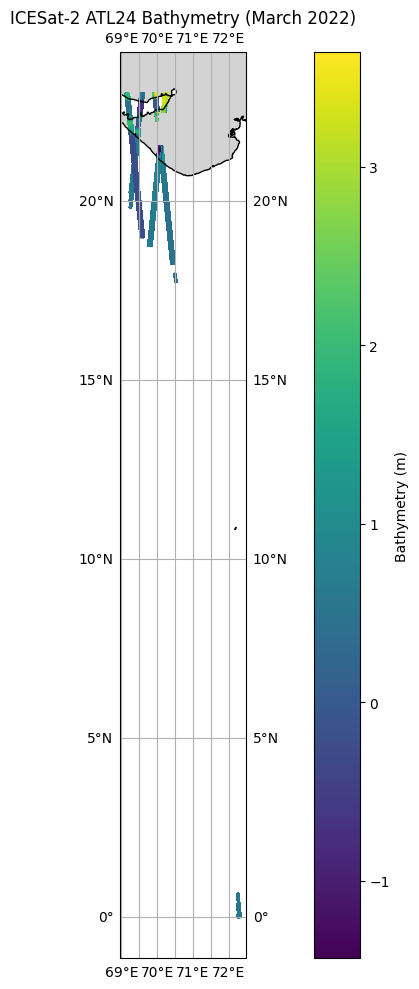

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map with coastlines
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot of surface heights
sc = ax.scatter(lon_all, lat_all, c=h_all, s=1, cmap='viridis', transform=ccrs.PlateCarree())

# Add coastlines and map features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Add colorbar and labels
plt.colorbar(sc, label='Bathymetry (m)')
plt.title('ICESat-2 ATL24 Bathymetry (March 2022)')
plt.tight_layout()
plt.show()

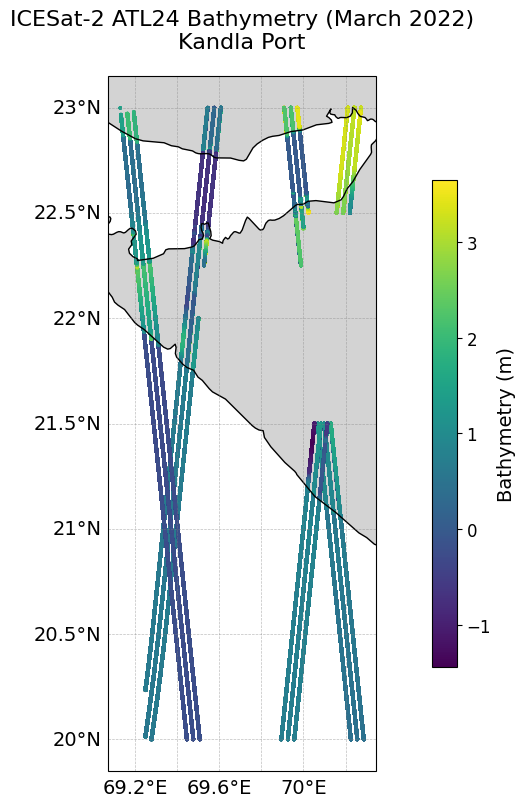

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Example variables (replace with your actual data)
# lon_all, lat_all, h_all = ...

# Apply filter: only include latitudes greater than 20
mask = lat_all > 20
lon_filtered = lon_all[mask]
lat_filtered = lat_all[mask]
h_filtered = h_all[mask]

# Set global font sizes for clarity in print
plt.rcParams.update({
    'font.size': 14,         # Base font size
    'axes.titlesize': 16,    # Title size
    'axes.labelsize': 14,    # Axis label size
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 16
})

# Create a map with coastlines - sized for A4 (landscape)
fig = plt.figure(figsize=(11.7, 8.3))  # A4 landscape in inches
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot of filtered surface heights
sc = ax.scatter(lon_filtered, lat_filtered, c=h_filtered, s=2, cmap='viridis', transform=ccrs.PlateCarree())

# Add coastlines and map features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Bathymetry (m)')

# Title
plt.title('ICESat-2 ATL24 Bathymetry (March 2022)\nKandla Port', pad=20)

# Save with tight layout for publication
plt.tight_layout()
plt.savefig('kandla_icesat2_publication.png', dpi=600, bbox_inches='tight')

In [14]:
!ls -lrt

total 339052
drwxr-xr-x 1 root root      4096 May 14 13:38 sample_data
-rw-r--r-- 1 root root  70250519 May 23 00:15 ATL24_20220318230308_13241401_006_01_001_01.h5
-rw-r--r-- 1 root root  84500155 May 23 00:15 ATL24_20220314231126_12631401_006_01_001_01.h5
-rw-r--r-- 1 root root  87881723 May 23 00:15 ATL24_20220326105212_00511507_006_01_001_01.h5
-rw-r--r-- 1 root root 103531168 May 23 00:16 ATL24_20220322110032_13771407_006_01_001_01.h5
-rw-r--r-- 1 root root    992181 May 23 03:37 kandla_icesat2.png
